In [2]:
#installations
!pip install scikit-learn tensorflow matplotlib numpy
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [4]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [5]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [6]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

2024-10-02 23:01:24.986785: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
468/469 [============================>.] - ETA: 0s - loss: 2.2862 - accuracy: 0.1459

2024-10-02 23:01:32.506051: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


469/469 [==============================] - 7s 13ms/step - loss: 2.2862 - accuracy: 0.1461 - val_loss: 2.2556 - val_accuracy: 0.2173
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 2.2300 - accuracy: 0.3415 - val_loss: 2.2011 - val_accuracy: 0.4223
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 2.1678 - accuracy: 0.4918 - val_loss: 2.1277 - val_accuracy: 0.4570
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 2.0812 - accuracy: 0.5401 - val_loss: 2.0230 - val_accuracy: 0.5543
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 1.9576 - accuracy: 0.5811 - val_loss: 1.8761 - val_accuracy: 0.6276
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 1.7920 - accuracy: 0.6148 - val_loss: 1.6905 - val_accuracy: 0.6550
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 1.5990 - accuracy: 0.6508 - val_loss: 1.4912 - val_accuracy: 0.6827
Epoch 8/10

In [7]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       980
           1       0.78      0.99      0.87      1135
           2       0.84      0.72      0.77      1032
           3       0.65      0.80      0.72      1010
           4       0.68      0.92      0.78       982
           5       0.87      0.37      0.52       892
           6       0.85      0.89      0.87       958
           7       0.77      0.89      0.82      1028
           8       0.81      0.68      0.74       974
           9       0.85      0.47      0.61      1009

    accuracy                           0.78     10000
   macro avg       0.79      0.77      0.76     10000
weighted avg       0.79      0.78      0.76     10000



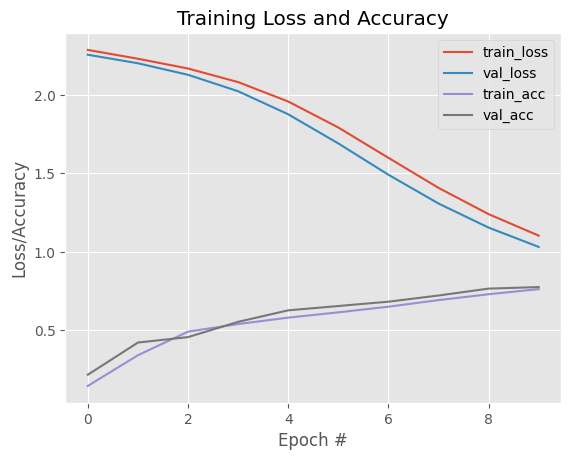

In [8]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()